In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import *

%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

In [3]:
data = pd.read_csv('ai1.csv')
data.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1202590843006,3.000,353.0,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000
1,274877907034,9.293,17.0,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000
2,884763263056,3.000,189.0,1.139675,9.545974,1.951334,-0.006899,-0.015080,0.001122,973.0,0.667059
3,1073741824054,3.900,126.0,3.871543,10.386364,-0.136474,0.001344,-0.339601,-0.017956,902.0,7.913285
4,1056561954943,3.900,50.0,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530,820.0,20.419409


In [4]:
data.shape

(1613554, 11)

In [5]:
label = pd.read_csv('label.csv')
print(label.shape)
label.head()

(20018, 2)


,bookingID,label
0,111669149733,0
1,335007449205,1
2,171798691856,0
3,1520418422900,0
4,798863917116,0


In [7]:
label.label.value_counts()

0    15017
1     5001
Name: label, dtype: int64

In [6]:
df = data.merge(label, on='bookingID')
print(df.shape)
df.head()

(1615468, 12)


,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
0,1202590843006,3.000,353.0,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000,1
1,1202590843006,3.033,77.0,1.137217,8.975278,3.981050,0.021118,-0.022515,0.024522,541.0,0.000000,1
2,1202590843006,6.173,283.0,1.522818,7.947064,5.075056,0.137567,-0.297055,-0.017418,154.0,2.863286,1
3,1202590843006,3.014,353.0,1.134775,8.932489,3.929421,-0.007959,-0.020543,-0.022986,1384.0,0.000000,1
4,1202590843006,5.209,340.0,0.858197,9.078037,2.944571,0.061924,0.015219,0.025517,1142.0,9.750134,1


In [10]:
df.tail(9)

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
1615459,317827579962,10.0,290.154785,-0.989929,-11.643930,-0.766522,0.088602,-0.025538,-0.061826,45.0,11.580000,0
1615460,317827579962,10.0,288.032593,0.543713,-9.566275,0.404346,-0.041425,-0.036639,0.167231,75.0,1.060000,0
1615461,317827579962,10.0,289.173309,0.633585,-9.773083,0.348718,-0.012938,0.040466,0.012922,55.0,1.060000,0
1615462,317827579962,10.0,267.230988,-0.740204,-9.508255,1.697385,-0.007793,-0.207364,0.051512,146.0,7.720000,0
1615463,317827579962,10.0,288.363495,0.142059,-10.648468,0.125909,-0.047125,0.056322,0.012935,41.0,15.070000,0
1615464,317827579936,8.0,107.233719,0.050262,-1.019745,-0.105118,-0.008879,-0.026914,0.027343,1.0,6.290734,1
1615465,317827579936,8.0,47.093388,0.383896,-1.118851,-0.078064,-0.012207,-0.053673,0.241194,471.0,23.148508,1
1615466,317827579936,8.0,49.320091,0.014923,-0.911423,-0.453918,0.117212,-0.078938,0.080113,509.0,12.872745,1
1615467,317827579936,8.0,47.526382,-0.099838,-1.147659,-0.219040,0.146051,0.169827,-0.066196,529.0,13.162260,1


In [12]:
df[df.label == 1].describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
count,4.942220e+05,494222.000000,494222.000000,494222.000000,494222.000000,494222.000000,494222.000000,494222.000000,494222.000000,494222.000000,494222.000000,494222.0
mean,8.503155e+11,12.749501,167.461071,0.071604,4.325716,0.962895,-0.001091,-0.001123,-0.000178,750.765205,8.612572,1.0
std,4.990773e+11,88.161770,108.445438,1.644509,7.993956,3.643475,0.191772,0.503286,0.219123,564.855438,8.170272,0.0
min,1.000000e+00,0.750000,0.000000,-32.768044,-57.303592,-59.957580,-26.448020,-57.344890,-53.554450,0.000000,-1.000000,1.0
25%,4.123169e+11,3.900000,75.000000,-0.529556,-2.014813,-0.983350,-0.026925,-0.030960,-0.019409,326.000000,0.530000,1.0
50%,8.589935e+11,4.459000,166.827499,0.063751,8.988869,0.833182,-0.000454,0.000209,0.000000,663.000000,6.696943,1.0
75%,1.279900e+12,8.000000,263.000000,0.664391,9.688000,2.952141,0.024285,0.032104,0.018613,1064.000000,15.060000,1.0
max,1.709397e+12,3238.847000,359.996338,29.616470,72.810000,73.314210,10.688105,29.600307,25.535389,8232.000000,50.550000,1.0


In [13]:
df[df.label == 0].describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
count,1.121246e+06,1.121246e+06,1.121246e+06,1.121246e+06,1.121246e+06,1.121246e+06,1.121246e+06,1.121246e+06,1.121246e+06,1.121246e+06,1.121246e+06,1121246.0
mean,8.046625e+11,1.104981e+01,1.695634e+02,6.670598e-02,4.526928e+00,8.679339e-01,-2.044802e-03,1.102104e-03,-3.014109e-04,6.612549e+03,9.184796e+00,0.0
std,4.928671e+11,8.590711e+01,1.067335e+02,1.317715e+00,8.190306e+00,3.061635e+00,1.151665e-01,2.463434e-01,1.110749e-01,1.939795e+06,8.071954e+00,0.0
min,0.000000e+00,9.000000e-01,0.000000e+00,-3.344084e+01,-2.451818e+01,-7.844842e+01,-2.069082e+01,-3.195618e+01,-1.782868e+01,0.000000e+00,-1.719776e+00,0.0
25%,3.779571e+11,3.900000e+00,7.900000e+01,-4.996002e-01,-2.131189e+00,-9.062051e-01,-2.679255e-02,-2.938843e-02,-1.832814e-02,2.170000e+02,1.264959e+00,0.0
50%,7.730941e+11,4.074000e+00,1.690000e+02,6.010895e-02,9.117120e+00,7.585077e-01,-7.715325e-04,3.051758e-04,-3.490659e-05,4.700000e+02,7.903621e+00,0.0
75%,1.211181e+12,8.000000e+00,2.620000e+02,6.227417e-01,9.718657e+00,2.672011e+00,2.295641e-02,3.104161e-02,1.810950e-02,7.800000e+02,1.565056e+01,0.0
max,1.700807e+12,6.063000e+03,3.599985e+02,2.205521e+01,6.115936e+01,4.433215e+01,9.900904e+00,6.254202e+01,3.383183e+01,6.193165e+08,4.496944e+01,0.0


In [15]:
df[df.Accuracy < 0].shape

(0, 12)

In [20]:
df.columns

Index(['bookingID', 'Accuracy', 'Bearing', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z', 'second', 'Speed',
       'label'],
      dtype='object')

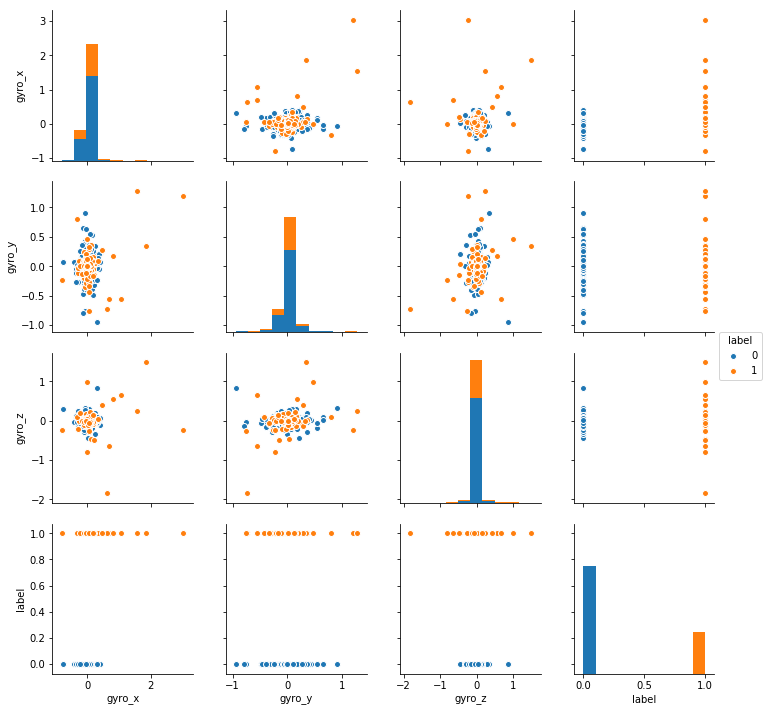

In [22]:
sns.pairplot(df[['gyro_x', 'gyro_y', 'gyro_z', 'label']].sample(1000), hue="label");

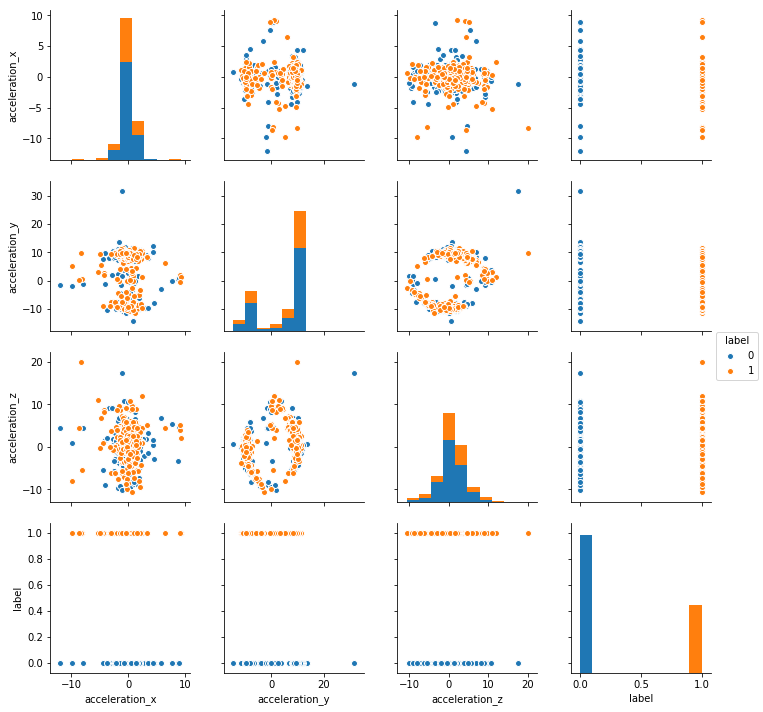

In [21]:
sns.pairplot(df[['acceleration_x', 'acceleration_y',
       'acceleration_z', 'label']].sample(1000), hue="label");

- create features by product of features
- use dask to load data?

In [ ]:
class Preprocess_class:
    
    def __init__(self):
        self.reader = geoip2.database.Reader('data/GeoLite2-City.mmdb')
    
    
    def detect_lat(self, ip):
        
        try:
            city = self.reader.city(ip).location.latitude
            return city
        except:
            return np.nan

    def detect_long(self, ip):
        try:
            city = self.reader.city(ip).location.longitude
            return city
        except:
            return np.nan
    
    def create_features(self, df):
        # set unregistered user to 0
        df['fk_social_user_id'] = np.where(df.fk_social_user_id.isnull(), 0, df.fk_social_user_id)
        df['is_registered'] = np.where(df.fk_social_user_id==0, 0, 1)
   
        # df.click_date = df.click_date.astype('datetime64[ns]')
        df.click_date = pd.to_datetime(df.click_date)
        # click_date - to features
        df['click_month'] = df.click_date.dt.month
        df['click_day'] = df.click_date.dt.day
        df['click_dayofweek'] = df.click_date.dt.dayofweek
        # feature from ip
        df['long'] = df.ip_address.apply(lambda x: self.detect_long(x))
        df['lat'] = df.ip_address.apply(lambda x: self.detect_lat(x))
        
        df['conversion'] = np.where(df.trd_conversion_id.isnull(), 0,1)
        
        df = df.drop(['fk_social_user_id', 'trd_conversion_id', 'id', 'click_date', 'ip_address'], axis=1)
        return df
    
    def process(self, df):
        df = self.remove_bot(df)
        df = self.merge_df(df, conv)
#         print(df.isnull().sum())
        df = self.create_features(df)
        return df

In [ ]:
preprocess = preprocess()

df_ml = preprocess.process()


In [ ]:
# save model
def train(input_df):
    try random forest, svc, 
#     train model
#     save model
#     test performance
    pass

In [ ]:
# y_pred_test = fit_model.predict(X_test)
y_predprob_test = clf.predict_proba(X_test)[:,1]
accuracy = accuracy_score(y_test, y_predictions)

p, r, _ = precision_recall_curve(y_test, y_predprob_test)

roc_auc = roc_auc_score(y_test, y_predprob_test)
pr_auc = auc(r, p)
fpr, tpr, threshold = roc_curve(y_test, y_predprob_test)

print('accuracy: {}'.format(accuracy))
print('roc_auc: {}'.format(roc_auc))
print('pr_auc: {}'.format(pr_auc))

# plot roc  and p-r curve
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'ROC_AUC = %0.2f' % roc_auc)
plt.fill_between(fpr, tpr, alpha=0.1, color='b')
plt.plot([0, 1], [0, 1],'r--', label = 'baseline')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.subplot(1, 2, 2)
plt.title('Precision-Recall Curve')
plt.plot(r, p, 'b', label = 'PR_AUC = %0.2f' % pr_auc)
plt.fill_between(r, p, alpha=0.1, color='b')
# plt.plot([0, 1], [1,0],'r--')
plt.plot([0, 1], [0.5,0.5],'r--', label = 'baseline')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.tight_layout();

In [ ]:
def predict(input df):
    preprocess(df)
    load saved model
    predict
    return result